In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open(r"style-table.css").read() + open(r"style-notebook.css").read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv(r"data/titles.csv", index_col=None)
titles.head()

,title,year
0,The Symbol of Sacrifice,1918
1,Galactic Raiders,2004
2,Haytabo,1971
3,Can pazari,1976
4,Bel amour,1951


In [5]:
cast = pd.DataFrame.from_csv(r"data/cast.csv", index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [79]:
#Define a year as a "Superman year" whose films feature more Superman characters than Batman. 
#How many years in film history have been Superman years?
c = cast[(cast.character == 'Superman') | (cast.character == 'Batman')]
c = c.groupby(['year','character']).size()
c = c.unstack()
c = c.fillna(0)
c.head(10)

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0
1950,0.0,1.0
1951,0.0,2.0
1953,2.0,0.0
1954,0.0,5.0


In [70]:
#continued from above cell
d = c.Superman - c.Batman
print('Superman years: ', len(d[d > 0.0]))

Superman years:  11


In [72]:
#How many years have been "Batman years", with more Batman characters than Superman characters?
d = c.Batman - c.Superman
print('Batman years: ', len(d[d > 0.0]))

Batman years:  27


In [132]:
#Display the number of actor roles each year and the number of actress roles each year over the history of film.
c = cast.groupby(['year','type']).size()
c = c.unstack('type')
c = c.fillna(0.0)
c

type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,0.0
1905,1.0,0.0
1906,14.0,3.0
1907,5.0,0.0
1908,29.0,13.0
1909,3.0,0.0
1910,44.0,24.0
1911,124.0,60.0


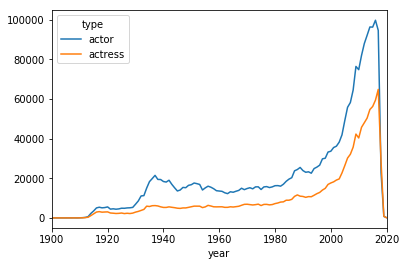

In [10]:
#Plot the number of actor roles each year and the number of actress roles each year over the history of film.
c = cast.groupby(['year','type']).size()
c = c.unstack('type')
c = c.fillna(0.0)
c.plot(kind='line',xlim=[1900,2020])

In [9]:
print(c)

type    actor  actress
year                  
1894      2.0      1.0
1900      2.0      0.0
1905      1.0      0.0
1906     14.0      3.0
1907      5.0      0.0
1908     29.0     13.0
1909      3.0      0.0
1910     44.0     24.0
1911    124.0     60.0
1912    251.0    156.0
1913    636.0    339.0
1914   2275.0   1169.0
1915   3531.0   2073.0
1916   5041.0   2957.0
1917   5394.0   3169.0
1918   5085.0   2898.0
1919   5224.0   2985.0
1920   5551.0   3041.0
1921   4431.0   2480.0
1922   4593.0   2375.0
1923   4392.0   2237.0
1924   4549.0   2304.0
1925   4896.0   2464.0
1926   4856.0   2191.0
1927   5042.0   2348.0
1928   5109.0   2213.0
1929   5307.0   2422.0
1930   6899.0   2923.0
1931   8568.0   3286.0
1932  11085.0   3777.0
...       ...      ...
1997  29809.0  14056.0
1998  30111.0  14915.0
1999  33236.0  16901.0
2000  33642.0  17635.0
2001  35502.0  18196.0
2002  36189.0  19098.0
2003  38223.0  19668.0
2004  41915.0  22689.0
2005  49071.0  26360.0
2006  55810.0  30199.0
2007  58197

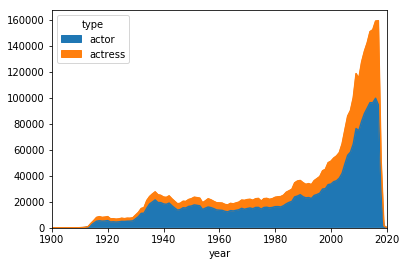

In [8]:
#Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.
#c = cast.groupby(['year','type']).size()
#c = c.unstack('type')
#c = c.fillna(0.0)
c.plot(kind='area',xlim=[1900,2020])
#not sure why actor showing less??

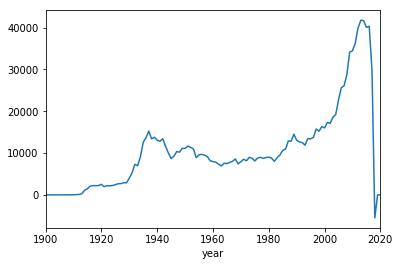

In [166]:
#Plot the difference between the number of actor roles each year 
#and the number of actress roles each year over the history of film.
c = cast.groupby(['year','type']).size()
c = c.unstack('type')
c = c.fillna(0.0)
d = c.actor - c.actress
d.plot(xlim=[1900,2020])

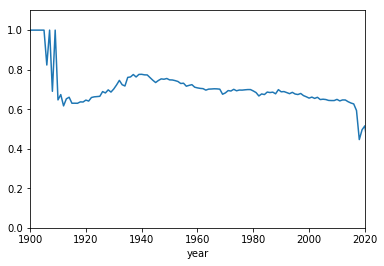

In [167]:
#Plot the fraction of roles that have been 'actor' roles each year in the history of film.
c = cast.groupby(['year','type']).size()
c = c.unstack('type')
c = c.fillna(0.0)
d = ((c.actor) / (c.actor + c.actress))
d.plot(xlim=[1900,2020],ylim=[0.0,1.1])
# fillna is making a diffference

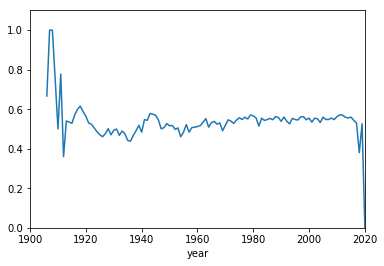

In [170]:
#Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.
c = cast[cast.n == 2]
c = c.groupby(['year','type']).size()
c = c.unstack('type')
c = c.fillna(0.0)
d = c.actor / (c.actor + c.actress)
d.plot(xlim=[1900,2020],ylim=[0.0,1.1])

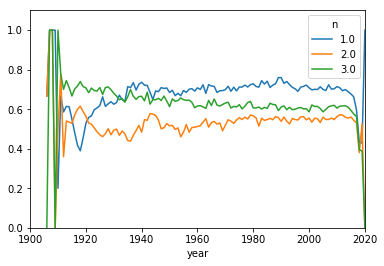

In [203]:
#Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction 
#of that rank's roles were 'actor' roles for each year in the history of film.
c = cast[cast.n <= 3]
c = c.groupby(['year','type','n']).size()
c = c.unstack('type')
c = c.fillna(0.0)
c = (c.actor) / (c.actor + c.actress)
c = c.unstack('n').fillna(0.0)
c.plot(xlim=[1900,2020],ylim=[0.0,1.1])